<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Black-Scholes_Model_Berkshire_Hathaway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cours sur le Modèle Black-Scholes avec Berkshire Hathaway (BRK-A)**
# **Introduction**

Le modèle Black-Scholes est une formule mathématique utilisée pour calculer le prix théorique des options européennes. Il repose sur plusieurs hypothèses, notamment que le prix de l'actif sous-jacent suit une distribution log-normale.

# **Hypothèses du Modèle Black-Scholes**

Le prix de l'actif suit une marche aléatoire avec une moyenne et une variance constantes.
Pas de coûts de transaction ni d'impôts.
Les taux d'intérêt sans risque sont constants.
L'option est européenne (exercée uniquement à l'échéance).
Pas de dividendes pendant la durée de l'option.

[*********************100%%**********************]  1 of 1 completed


Le prix de l'option d'achat est : 41878.05
Le prix de l'option de vente est : 41311.33


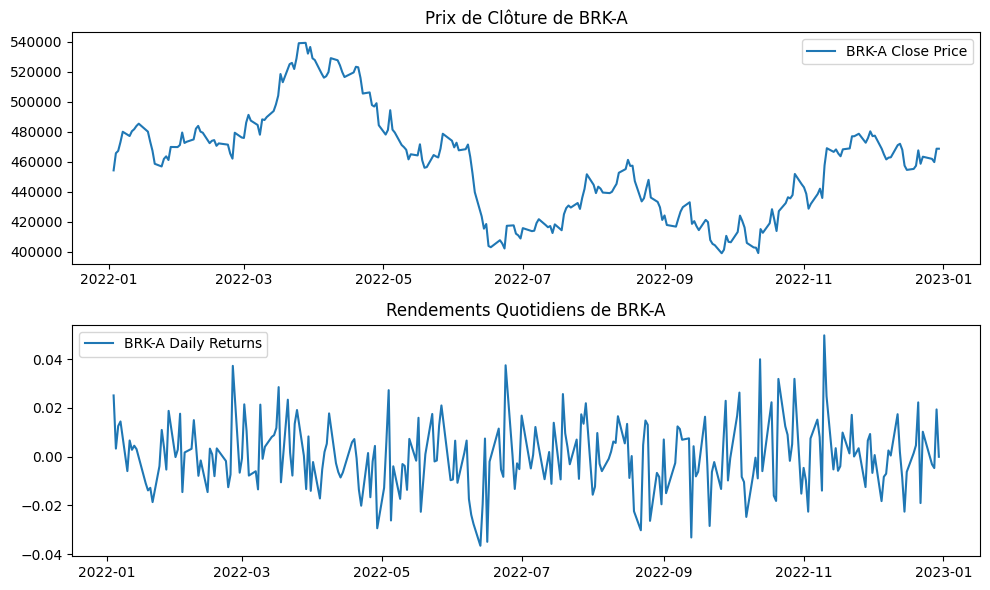

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as si
import matplotlib.pyplot as plt

class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S  # Prix actuel de l'actif
        self.K = K  # Prix d'exercice
        self.T = T  # Temps à l'échéance
        self.r = r  # Taux d'intérêt sans risque
        self.sigma = sigma  # Volatilité

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)

    def call_option_price(self):
        return self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0)

    def put_option_price(self):
        return self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0)

# Télécharger les données historiques de BRK-A
data = yf.download('BRK-A', start="2022-01-01", end="2023-01-01")
data['returns'] = data['Close'].pct_change()

# Calculer la moyenne et l'écart type des rendements quotidiens
daily_returns = data['returns'].dropna()
mean_return = daily_returns.mean()
std_return = daily_returns.std()

# Paramètres de l'option
S = data['Close'][-1]  # Dernier prix de clôture
K = S * 1.05  # Prix d'exercice (5% au-dessus du prix actuel)
T = 1  # 1 an à l'échéance
r = 0.05  # Taux d'intérêt sans risque
sigma = std_return * np.sqrt(252)  # Volatilité annualisée

# Créer une instance du modèle Black-Scholes
bsm = BlackScholesModel(S, K, T, r, sigma)

# Calculer les prix des options
call_price = bsm.call_option_price()
put_price = bsm.put_option_price()

print(f"Le prix de l'option d'achat est : {call_price:.2f}")
print(f"Le prix de l'option de vente est : {put_price:.2f}")

# Visualiser les prix historiques et les rendements
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='BRK-A Close Price')
plt.title('Prix de Clôture de BRK-A')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['returns'], label='BRK-A Daily Returns')
plt.title('Rendements Quotidiens de BRK-A')
plt.legend()

plt.tight_layout()
plt.show()

# **Interprétation des Résultats**

**Paramètres Utilisés :**

**Prix actuel de l'action (S)** : Dernier prix de clôture de BRK-A.

**Prix d'exercice (K)** : 5% au-dessus du prix actuel pour simuler une option à la hausse.

**Temps à l'échéance (T)** : 1 an.

**Taux d'intérêt sans risque (r)** : 5%.

**Volatilité (σ)** : Volatilité annualisée calculée à partir des rendements quotidiens.

# **Résultats :**
Les prix des options obtenus avec le modèle Black-Scholes sont influencés par la volatilité élevée de BRK-A. Une volatilité plus élevée entraîne généralement des prix d'options plus élevés, car le risque et la probabilité de fluctuations de prix augmentent.

Les graphiques montrent les prix de clôture historiques et les rendements quotidiens de BRK-A, illustrant la volatilité de l'actif.

# **Conclusion**
Le modèle Black-Scholes nous permet de calculer les prix théoriques des options en tenant compte des facteurs clés tels que le prix actuel de l'actif, le prix d'exercice, le temps à l'échéance, le taux d'intérêt sans risque et la volatilité. Pour un actif volatil comme BRK-A, la volatilité a un impact significatif sur les prix des options.